# Visualization with Matplotlib

In order to understand and effectively use Matplotlib to make visualizations of data, it's important to understand the parts of a Matplotlib figure object. The code in the cell below is [taken directly from the Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html), which uses Matplotlib code to create an annotated graph that demonstrates the many facets of a plot. And because the code is provided, it illustrates how to use them. Note that some of the objects and methods used in the code below are things that you might not use regularly (if ever). But many of the methods below will become very familiar to you throughout the rest of the semester and as you use Matplotlib in your research

### __Challenge:__ What is the code below doing?

Execute the Jupyter notebook code below and verify that it produces a plot with a variety of annotations. Then, with a partner, review the lines of the cell and add comments that denote what the line of code does. Also, in the last class when we made our first figure, we used the command `plt.xlabel('Axis label')` command as opposed to the use of the `ax.set_label('Axis label')` in the code below. Why do these two uses differ? 

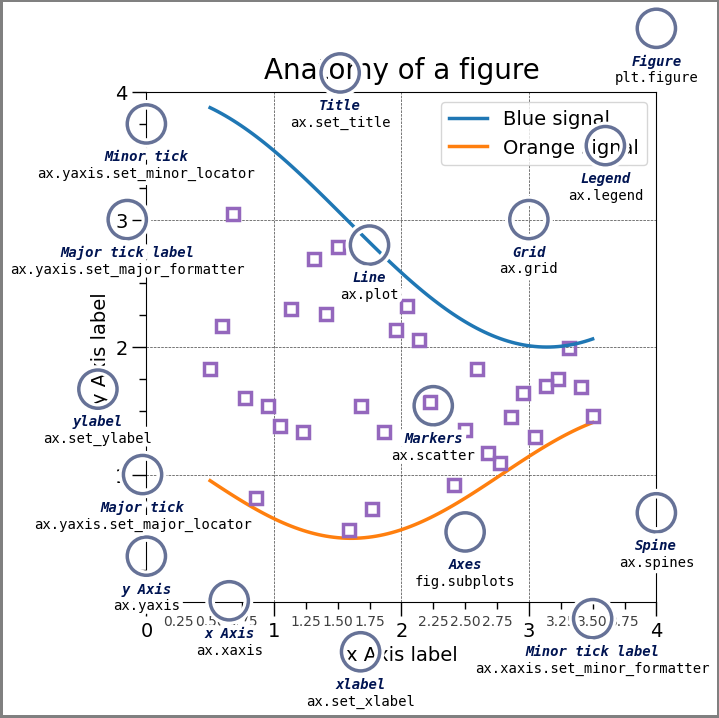

In [ ]:
import matplotlib.pyplot as plt # imports the matplotlib library as the shorthand plt
import numpy as np # importing numpy library as shorthand np

from matplotlib.patches import Circle  # imports ability to draw a circle shape
from matplotlib.patheffects import withStroke  # imports a formatting tool
from matplotlib.ticker import AutoMinorLocator, MultipleLocator # importing 2 tools to control tick marks

royal_blue = [0, 20/256, 82/256] # importing a specific RGB color code and saving it as a variable


# make the figure

np.random.seed(19680801)  # setting random seed

X = np.linspace(0.5, 3.5, 100)  # independent variable
Y1 = 3+np.cos(X) # one function
Y2 = 1+np.cos(1+X/0.75)/2 # another function
Y3 = np.random.uniform(Y1, Y2, len(X)) # random numbers between Y1 and Y2

fig = plt.figure(figsize=(7.5, 7.5)) # creating a figure with specified size
ax = fig.add_axes([0.2, 0.17, 0.68, 0.7], aspect=1) # adds axes to figure

ax.xaxis.set_major_locator(MultipleLocator(1.000)) # sets major ticks at every integer
ax.xaxis.set_minor_locator(AutoMinorLocator(4)) # sets the number of minor ticks on x axis
ax.yaxis.set_major_locator(MultipleLocator(1.000))
ax.yaxis.set_minor_locator(AutoMinorLocator(4)) # sets the number of minot ticks on the y axis 
ax.xaxis.set_minor_formatter("{x:.2f}") # rounds the minor ticks to 2 digits

ax.set_xlim(0, 4) # setting the x axis range
ax.set_ylim(0, 4) # setting the y axis range

ax.tick_params(which='major', width=1.0, length=10, labelsize=14) # sets the size and color of major ticks
ax.tick_params(which='minor', width=1.0, length=5, labelsize=10, # sets the sze and color of minor ticks
               labelcolor='0.25')

ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10) # sets grid styles

ax.plot(X, Y1, c='C0', lw=2.5, label="Blue signal", zorder=10) # adds blue curved line
ax.plot(X, Y2, c='C1', lw=2.5, label="Orange signal") # adds the orange curved line
ax.plot(X[::3], Y3[::3], linewidth=0, markersize=9, # adds ssquare markers with specific visual 
        marker='s', markerfacecolor='none', markeredgecolor='C4',
        markeredgewidth=2.5)

ax.set_title("Anatomy of a figure", fontsize=20, verticalalignment='bottom') # adds figure title with specific loaction
ax.set_xlabel("x Axis label", fontsize=14) # adds xlabel
ax.set_ylabel("y Axis label", fontsize=14) # adds y label
ax.legend(loc="upper right", fontsize=14) # adds legend in specified location


# Annotate the figure

def annotate(x, y, text, code): # creates a function called annotate with inputs x,y,text,code
    # Circle marker
    c = Circle((x, y), radius=0.15, clip_on=False, zorder=10, linewidth=2.5, # creates the circle marker appearance 
               edgecolor=royal_blue + [0.6], facecolor='none',
               path_effects=[withStroke(linewidth=7, foreground='white')])
    ax.add_artist(c) # adds the circles to the figure 

    # use path_effects as a background for the texts
    # draw the path_effects and the colored text separately so that the
    # path_effects cannot clip other texts
    for path_effects in [[withStroke(linewidth=7, foreground='white')], []]:
        color = 'white' if path_effects else royal_blue # adds a thin white line around the blue circle line if the color the circle is on top of is not white
        ax.text(x, y-0.2, text, zorder=100, # adds the first label to below the circle
                ha='center', va='top', weight='bold', color=color, style = 'italic',fontfamily='monospace',
                path_effects=path_effects)

        color = 'white' if path_effects else 'black' # adds the second label to below the first line wit hthe code 
        ax.text(x, y-0.33, code, zorder=100,
                ha='center', va='top', weight='normal', color=color,
                fontfamily='monospace', fontsize='medium',
                path_effects=path_effects)


# the following lines add the labels at specified points using the user defined functions above
# specifies location and then the two rows of text
annotate(3.5, -0.13, "Minor tick label", "ax.xaxis.set_minor_formatter")
annotate(-0.03, 1.0, "Major tick", "ax.yaxis.set_major_locator")
annotate(0.00, 3.75, "Minor tick", "ax.yaxis.set_minor_locator")
annotate(-0.15, 3.00, "Major tick label", "ax.yaxis.set_major_formatter")
annotate(1.68, -0.39, "xlabel", "ax.set_xlabel")
annotate(-0.38, 1.67, "ylabel", "ax.set_ylabel")
annotate(1.52, 4.15, "Title", "ax.set_title")
annotate(1.75, 2.80, "Line", "ax.plot")
annotate(2.25, 1.54, "Markers", "ax.scatter")
annotate(3.00, 3.00, "Grid", "ax.grid")
annotate(3.60, 3.58, "Legend", "ax.legend")
annotate(2.5, 0.55, "Axes", "fig.subplots")
annotate(4, 4.5, "Figure", "plt.figure")
annotate(0.65, 0.01, "x Axis", "ax.xaxis")
annotate(0, 0.36, "y Axis", "ax.yaxis")
annotate(4.0, 0.7, "Spine", "ax.spines")

# frame around figure
fig.patch.set(linewidth=4, edgecolor='0.5') # adds an edge to the figure
plt.show() # makes the figure show up

## __Challenge:__ Beautify an Intentionally Ugly Graph

The code in the cell below reads in daily average streamflow data for Water Year 2017 (i.e., from 2016-10-01 to 2017-09-30) for one of four gages in the Upper Boise River Basin. It uses the `pandas` library to do so. We'll learn a lot more about `pandas` later, but for now this provides us with the ability to deal with dates and times in a structured way that doesn't require us to format text. 

The cell that follows then creates a very rudimentary (i.e., bad) plot of the streamflow for the water year. Your task as a table, is to use what you learned about Matplotlib figures in the exercise above, and the [Matplotlib documentation](https://matplotlib.org/stable/users/index) (if needed) to create something approaching a "presentation ready" figure for streamflow at your gage. Some minimum characteristics of such a figure include:

- Use of SI units
- Labelled axes
- Clear labeling of what is being plotted (search the web if you need to)
- Legible font sizes

When you're done, create __one__ figure that represents the code of your table and paste the output figure it in [this shared slide deck](https://docs.google.com/presentation/d/1bUpZ3Ms1-QGXGN1pgU7CGhgaOo3ZtHv3ZnWLGHfxvj4/edit?usp=sharing). 


In [9]:
import pandas as pd # Needed to read data in

table = 1 # Your table

gages = ['13200000', # Mores Creek Above Robie Creek
         '13185000', # Boise River Near Twin Springs
         '13186000', # SF Boise River near Featherville 
         '13192200'  # SF Boise Near Arrowrock Dam
         ]

filename = 'Unit02-data/usgs_streamflow_'+gages[table]+'_dv.csv'

# Use Pandas to read the data into a "DataFrame." More on this later, but think of 
# df below as an object that stores a spreadsheet with columns that have names
df = pd.read_csv(filename)
display(df)


,date,q_cfs
0,2016-10-01,329.0
1,2016-10-02,331.0
2,2016-10-03,342.0
3,2016-10-04,351.0
4,2016-10-05,352.0
...,...,...
360,2017-09-26,502.0
361,2017-09-27,496.0
362,2017-09-28,489.0
363,2017-09-29,480.0


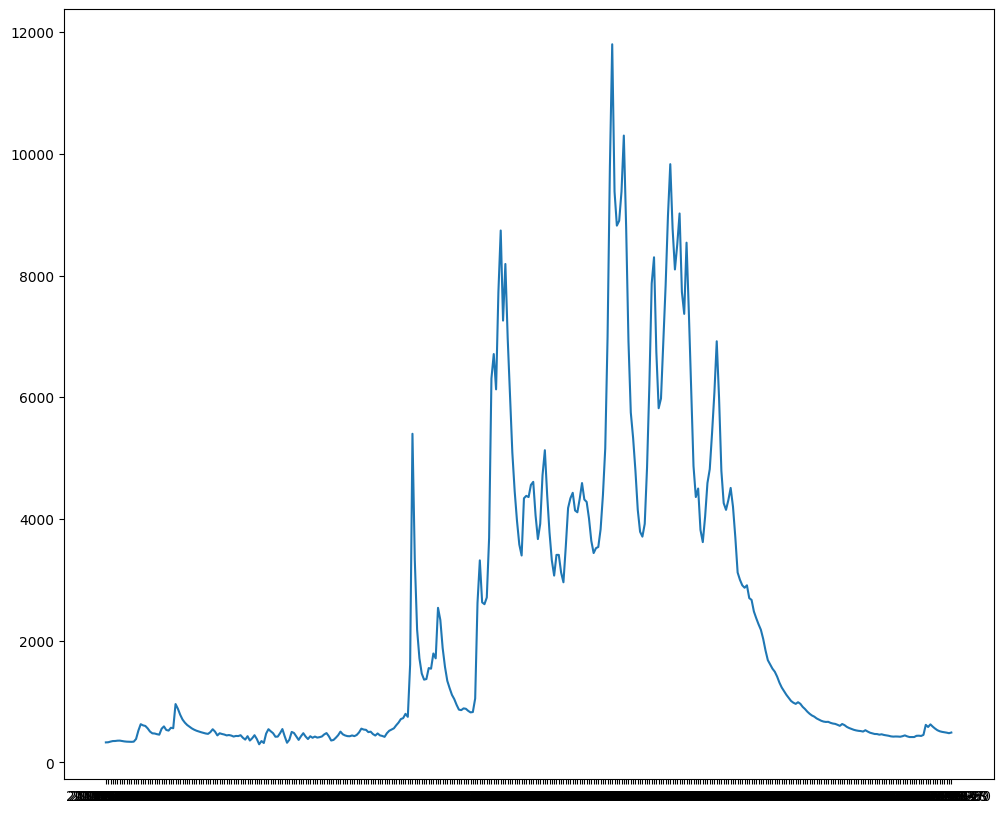

In [10]:
plt.figure(figsize=(12,10))
plt.plot(df.date, df.q_cfs)
plt.show()